
## 01MIAR - Actividad Video Valenbici

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas 3 y 4, así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código

### Entrega:
- Este mismo notebook con las respuetas

### Evaluación
- Esta actividad corresponde con el 10% de la nota final de la asignatura.

### Fecha Realización
- Convocatoria 1 - 19/05/2023 al 21/05/2023 hasta las 23:59 UTC+2

#### Descripción
El conjunto de datos "estaciones_bici.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web de la empresa municipal Valenbici, dedicada al alquiler de bicicletas en Valencia.

Los datos recabados de este servicio web son de mediciones cada 10 minutos de las estaciones:

https://valencia.opendatasoft.com/explore/dataset/valenbisi-disponibilitat-valenbisi-dsiponibilidad/information/

Cada estación está compuesta por un número variable de bornetas (total) donde se pueden anclar las bicicletas. Los datos obtenidos de cada estación (registros) refleja el número de bornetas libres (free) y el número de bicicletas disponibles (available).

#### Columnas para trabajar:
- number: id de la estación
- total: número total de bornetas
- updated (updated_at en origen): timestamp del estado en de bicis en la estación
- available: número de bicis disponibles

In [1]:
# Your impots here!!!
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

## 01
Carga de datos de csv (estaciones_bici.csv) en un DataFrame y exploración de datos
> Nota: los datos y la libreta de jupyter tienen que estar en la misma carpeta


In [2]:
con = sqlite3.connect('valenbisi.db')

cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
name_table = cursor.fetchall()[0][0]
print(name_table)

df = pd.read_sql_query(f"SELECT * FROM {name_table}", con)
con.close()

download


In [3]:
# La lína de código anterior guarda un dataframe con la signación df, de ello tomaremos solo las columnas que necesitamos 
data = df[['number','updated','total','available']]
display(data.head())

,number,updated,total,available
0,39,2023-05-04 16:20:06,19,5
1,46,2023-05-04 16:20:06,20,4
2,13,2023-05-04 16:20:06,24,15
3,22,2023-05-04 16:20:06,15,4
4,24,2023-05-04 16:20:06,20,7


In [4]:
# Mostramos la información de nuestro dataframe "data" para conocerlo
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222180 entries, 0 to 222179
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   number     222180 non-null  int64 
 1   updated    222180 non-null  object
 2   total      222180 non-null  int64 
 3   available  222180 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.8+ MB


None

<p>Nuestro dataframe está compuesto por tres filas con valores de tipo entero y una fila no numérica. Parece estar limpio (sin valores NaN o nulos)</p>

Si queremos conocer la estadística descriptiva, se observa a continuación. De la misma tomaremos el dato máximo correspondiente a 'number'

In [5]:
display(data.describe(include='all'))

,number,updated,total,available
count,222180.000000,222180,222180.000000,222180.000000
unique,NaN,815,NaN,NaN
top,NaN,2023-05-04 16:20:06,NaN,NaN
freq,NaN,276,NaN,NaN
mean,138.500000,NaN,19.818841,8.554114
std,79.673993,NaN,5.472917,6.512092
min,1.000000,NaN,9.000000,0.000000
25%,69.750000,NaN,15.000000,3.000000
50%,138.500000,NaN,20.000000,8.000000
75%,207.250000,NaN,20.000000,13.000000


## 02
Obtención del número de estaciones que tienen un total de 30 bornetas
¿Qué estaciones son?

In [6]:
# Realizamos un mask con la condición descrita en la pregunta.
mask = data['total'] == 30

# Verificamos si el mask aplicado al dataframe funciona correctamente
display(data[mask].head())


# Tomamos la serie 'number' del dataframe que estamos manejando y la convertimos en un set para evitar elementos repetidos.
estaciones_mask = set(data[mask]['number'])
# Para conocer el número de estaciones con 30 bornetas en total, identificamos el número de entradas (filas) con la función len
print(f"El número de estaciones con un total de 30 bornetas es {len(estaciones_mask)}.")
print()

print(f"Las estaciones que tienen 30 bornetas en total son {list(estaciones_mask)}.")

,number,updated,total,available
7,17,2023-05-04 16:20:06,30,19
30,89,2023-05-04 16:20:06,30,23
52,117,2023-05-04 16:20:06,30,7
122,114,2023-05-04 16:20:06,30,15
125,105,2023-05-04 16:20:06,30,20


El número de estaciones con un total de 30 bornetas es 11.

Las estaciones que tienen 30 bornetas en total son [226, 101, 105, 110, 111, 143, 17, 114, 117, 89, 189].


## 03
Número de estación con la media más alta de bicis disponibles

In [7]:
#Primero conozcamos cuantas estaciones hay (igualmente aparece en la estadística descriptiva) para asegurarnos que la respuesta que obtengamos tenga sentido.
#Para ello convertimos en un set la columna correspondiente al número de estación para eliminar repetidos e identificamos su longitud.
print(f"Hay {len(set(data['number']))} estaciones en total.\n")

# Agrupamos por número de estación y mediante la operación mean (media)
media_estacion = data.groupby(by='number').mean()

# Ahora la columna "number" corresponderá a los índices del dataframe "media_estacion" que utilizaremos. 
display(media_estacion.head())

# Aprovechamos esto para encontrar el índice del valor máximo de su columna "available" 
max_disponible = media_estacion.index[media_estacion['available'] == media_estacion['available'].max()]

# Para utilizar correctamente en el print la asignación anterior, tomamos su elemento 0 (aunque es el único valor que tiene)

print(f"El número de estación con la media más alta de bicis disponibles es {max_disponible[0]}")

Hay 276 estaciones en total.



C:\Users\USER EAT\AppData\Local\Temp\ipykernel_17380\2092107609.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_estacion = data.groupby(by='number').mean()


,total,available
number,,
1,25.0,4.175155
2,15.0,7.286957
3,20.0,4.822360
4,25.0,5.140373
5,15.0,5.036025


El número de estación con la media más alta de bicis disponibles es 101


## 04
Realizar el histograma de bicis disponibles de la estación del punto anterior

Text(0.5, 1.0, 'Bicis disponibles de la estación')

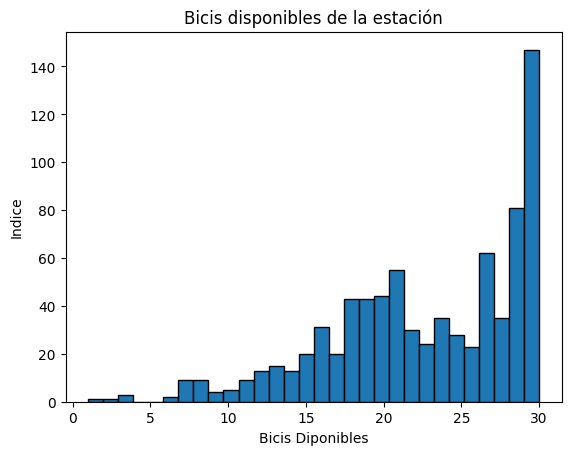

In [19]:
# Para poder trabajar únicamente con la estación del punto anterior la asignamos en una variable
estacion_histo = data["number"] == max_disponible[0]

# Con ayuda de matplotlib graficamos el histograma
plt.hist(data[estacion_histo]['available'], bins=30, edgecolor='black')

# Definimos las etiquetas x/y el título
plt.xlabel("Bicis Diponibles")
plt.ylabel("Indice")
plt.title("Bicis disponibles de la estación")


## 05
Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

,number,total,available
updated,,,
2023-05-04 16:20:06,101,30,13
2023-05-04 16:29:13,101,30,15
2023-05-04 16:39:47,101,30,16
2023-05-04 16:49:55,101,30,15
2023-05-04 17:00:06,101,30,16


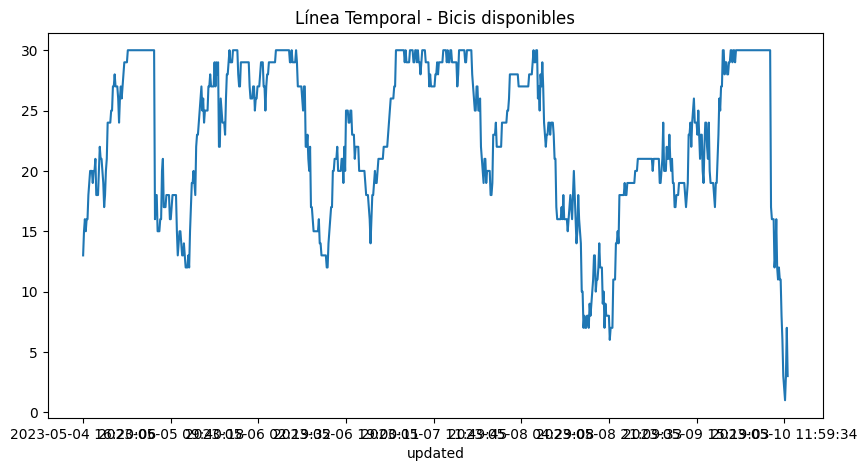

In [10]:
# Guargamos nuevamente el dataframe que contiene la información de la estación que nos interesa, 
# pero cuyos índices serán ahora la columna "updated" tomando en cuenta la pista dada en la pregunta
l_temp = data[estacion_histo].set_index(keys="updated")
display(l_temp.head())

# Realizamos el plot del gráfico respecto a la columna 'available y definimos su tamaño y título
plt.figure(figsize=(10, 5))
l_temp['available'].plot()
plt.title('Línea Temporal - Bicis disponibles')
plt.show()

<p>No se ve muy claro el gráfico y está un poco desordenado.</p>
<break>
Así que guardamos en un nuevo fichero .csv el dataframe que utilizamos

In [11]:
ruta = os.path.join("bicis_disponibles.csv")

l_temp.to_csv(ruta, sep=';')

,number,total,available
updated,,,
2023-05-04 16:00:00,101.0,30.0,14.750000
2023-05-04 17:00:00,101.0,30.0,18.428571
2023-05-04 18:00:00,101.0,30.0,19.333333
2023-05-04 19:00:00,101.0,30.0,20.400000
2023-05-04 20:00:00,101.0,30.0,19.857143


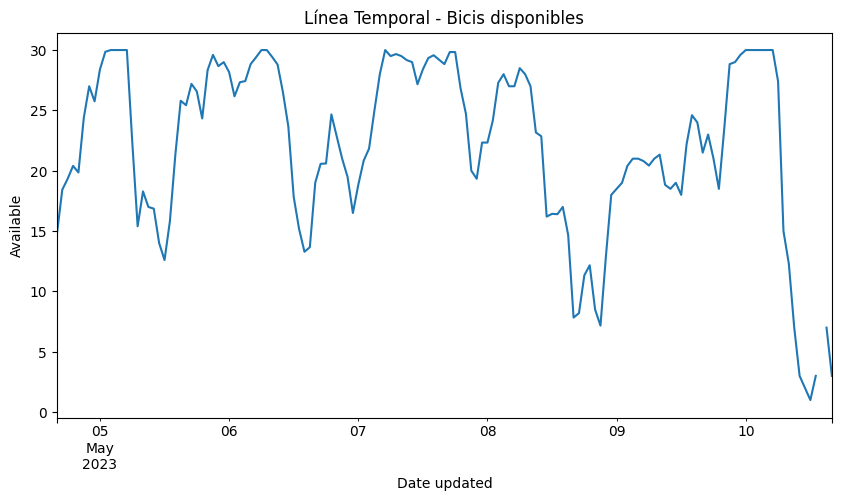

In [12]:
# Ahora podremos leer el fichero teniendo un DatetimeIndex, TimedeltaIndex o PeriodIndex...
linea_temp = pd.read_csv("bicis_disponibles.csv", sep=';', index_col=0, parse_dates=True)

# ...Ello nos permitirá agrupar por horas, ya que parece que los registros fueron tomados cada 10 minutos
linea_temp = linea_temp.resample('h').mean()
display(linea_temp.head())

# Finalmente obtenemos un gráfico más limpio y claro
plt.figure(figsize=(10, 5)) # Dimensiones tomadas temiendo en cuenta el ritmo de los registros y el número de bornetas
linea_temp['available'].plot()
plt.title('Línea Temporal - Bicis disponibles')
plt.xlabel('Date updated')
plt.ylabel('Available')
plt.show()